# Properties of liquid water and ices along melting curves
### Data from simulations performed for the integration of the Clausius-Clapeyron equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from os.path import exists
import os
from scipy.interpolate import interp1d, UnivariateSpline
from matplotlib.patches import Ellipse

In [2]:
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
timestep=0.0005/1000 # ns

## Ice V

IceV/Run-Individual-1/step.-2/New/0/phase2/thermo.phase2
0 270.37 K 2750 bar 1.1258947322058657 -16.03137982973382
IceV/Run-Individual-1/step.-1/New/0/phase2/thermo.phase2
1 267.11 K 2500 bar 1.105971828928195 -16.040466849647608
IceV/Run-Individual-1/step.-1/New/2/phase2/thermo.phase2
2 265.17 K 2375 bar 1.0992080113015723 -16.04501130676204
IceV/Run-Individual-1/step.0/0/phase2/thermo.phase2
3 263.16 K 2250 bar 1.085847180169593 -16.051397215450564
IceV/Run-Individual-1/step.0/2/phase2/thermo.phase2
4 260.19 K 2125 bar 1.0586294037695592 -16.061065441164004
IceV/Run-Individual-1/step.1/0/phase2/thermo.phase2
5 257.24 K 2000 bar 1.0185767570387894 -16.076167120996143
IceV/Run-Individual-1/step.1/2/phase2/thermo.phase2
6 247.79 K 1875 bar 0.9903313523007098 -16.100513165575947
IceV/Run-Individual-1/step.1/3/phase2/thermo.phase2
7 235.99 K 1750 bar 0.9794533924652011 -16.114965035297164
[0.275  0.25   0.2375 0.225  0.2125 0.2    0.1875 0.175 ]


/usr/licensed/anaconda3/2019.3/lib/python3.7/site-packages/ipykernel_launcher.py:165: RuntimeWarning: divide by zero encountered in log
/usr/licensed/anaconda3/2019.3/lib/python3.7/site-packages/ipykernel_launcher.py:178: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


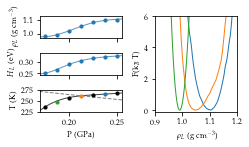

In [66]:
#fig, axs = plt.subplots(3,1,sharex=True)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)

fig, axs = plt.subplot_mosaic([['ul', 'right'],
                               ['cl', 'right'],
                               ['ll', 'right']],
                              figsize=(3.5, 2.), layout="constrained")

groundstateenergy=-16.365200977904333
eV_to_kJmol=96.48530749925791

factor=10*18.01528/(6.0221408)
folders=np.array([
    "IceV/Run-decrease-pressure-individual/step.-2/New/0",
    "IceV/Run-decrease-pressure-individual/step.-1/New/0",
    "IceV/Run-decrease-pressure-individual/step.-1/New/2",
    "IceV/Run-decrease-pressure-individual/step.0/0",
    "IceV/Run-decrease-pressure-individual/step.0/2",
    "IceV/Run-decrease-pressure-individual/step.1/0",
    "IceV/Run-decrease-pressure-individual/step.1/2",
    "IceV/Run-decrease-pressure-individual/step.1/3"
])
Nmolecules_array=np.array([
    192,
    192,
    192,
    192,
    192,
    192,
    192,
    192
])
mycolors=np.array([
        'black',
        'black',
        colors[0],
        'black',
        colors[1],
        'black',
        colors[2],
        'black'
])
Ndata=folders.shape[0]
mytemperatureV=np.zeros(Ndata)
mypressureV=np.zeros(Ndata)
mydensityV=np.zeros(Ndata)
myenthalpyV=np.zeros(Ndata)
mynumbersV=np.zeros(Ndata)
counter=0
for folder in folders:
    filename=folder + "/phase2/thermo.phase2"
    filename2=folder + "/in.thermosettings"
    print(filename)
    if (exists(filename)):  
        pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
        temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
        str_temp="{:.2f}".format(float(temperature.strip()))
        data=np.genfromtxt(filename)
        #if (j<0):
        #    Nmolecules=336
        #else:
        Nmolecules=Nmolecules_array[counter]
        ignore=int(data.shape[0]/4)
        print(counter,str_temp + " K",str(int(float(pressure.strip()))) + " bar",factor/(np.mean(data[ignore:,2]/Nmolecules)),np.mean(data[ignore:,1]/Nmolecules))
        mytemperatureV[counter]=float(str_temp)
        mypressureV[counter]=float(pressure.strip())/10000
        mydensityV[counter]=factor/(np.mean(data[ignore:,2]/Nmolecules))
        myenthalpyV[counter]=np.mean(data[ignore:,1]/Nmolecules)-groundstateenergy
        mynumbersV[counter]=counter
        counter += 1
    else:
        print("No file " + filename)
            
mymarkersize=10

axs["ul"].scatter(mypressureV,mydensityV,color=colors[0],s=mymarkersize)
axs["ul"].set_ylabel(r"$\rho_L$ (g cm$^{-3}$)")
print(mypressureV)
f_spline = UnivariateSpline(np.flip(mypressureV),np.flip(mydensityV),s=0.00005)
x=np.linspace(0.17,0.255,1000)
axs["ul"].plot(x,f_spline(x),color=colors[0],alpha=0.75,linewidth=1,zorder=0)
axs["ul"].set_xlim([0.17,0.255])
axs["ul"].set_xticklabels([])

axs["cl"].scatter(mypressureV,myenthalpyV,color=colors[0],s=mymarkersize)
axs["cl"].set_ylabel("$H_L$ (eV)")
f_spline = UnivariateSpline(np.flip(mypressureV),np.flip(myenthalpyV),s=0.000005)
x=np.linspace(0.17,0.255,1000)
axs["cl"].plot(x,f_spline(x),color=colors[0],alpha=0.75,linewidth=1,zorder=0)
axs["cl"].set_xlim([0.17,0.255])
axs["cl"].set_xticklabels([])

for i in range(mypressureV.shape[0]):
    axs["ll"].scatter(mypressureV[i],mytemperatureV[i],s=mymarkersize,color=mycolors[i])
    
thermo = np.genfromtxt("Results/thermo_condition_iceV.txt")
f_spline = UnivariateSpline(thermo[:,0]/10000,thermo[:,1],s=0.01)
x=np.linspace(0.17,0.255,1000)
axs["ll"].plot(x,f_spline(x),color='black',alpha=0.75,linewidth=1,zorder=0)

widom=np.genfromtxt("Results/WidomLineErr.txt")
widom=widom[widom[:,1]<3100,:]
widom[:,1]=widom[:,1]/10000
widom[:,2]=widom[:,2]/10000
axs["ll"].plot(widom[:,1],widom[:,0],'--',color='gray',linewidth=1,zorder=0)



axs["ll"].set_xlim([0.17,0.255])
axs["ll"].set_ylim([225,275])
axs["ll"].set_xlabel("P (GPa)")
axs["ll"].set_ylabel("T (K)")
#axs["ll"].text(0.19,240,"Ice V coexistence line",fontsize=15)

folders=np.array([
    "IceV/Run-decrease-pressure-individual/step.-1/New/2",
    "IceV/Run-decrease-pressure-individual/step.0/2",
    "IceV/Run-decrease-pressure-individual/step.1/2",
])
Nmolecules_array=np.array([
    192,
    192,
    192
])
counter=0
for folder in folders:
    if counter==0:
        filename=folder + "/phase2/thermo.phase2"
    else:
        filename=folder + "/phase2/thermo.phase2"
    filename2=folder + "/in.thermosettings"
    if (exists(filename)):  
        pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
        temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
        #print(pressure,temperature)
        str_temp="{:.2f}".format(float(temperature.strip()))
        #print(str_temp)
        data=np.genfromtxt(filename)
        Nmolecules=Nmolecules_array[counter]
        ignore=int(data.shape[0]/4)
        #if (counter==0):
        #    Nbins=30
        #else:
        Nbins=80
        histo, bins = np.histogram(factor/(data[ignore:,2]/Nmolecules),range=(0.9,1.2),bins=Nbins,density=True) # ,range=(25.5,31.5)
        bin_ctr = (bins[1:]+bins[:-1])/2
        fes = -np.log(histo)
        fes -= np.amin(fes)
        axs["right"].plot(bin_ctr,fes,label=str_temp + " K - " + str(int(float(pressure.strip()))) + " bar",linewidth=1)
        counter += 1
    else:
        print("No file " + filename)
            
axs["right"].set_ylim([-0.1,6])
axs["right"].set_xlim([0.9,1.2])
#plt.legend(fontsize=15)
axs["right"].set_xlabel(r"$\rho_L$ (g cm$^{-3}$)")
axs["right"].set_ylabel("F(k$_B$ T)")

plt.tight_layout()

plt.savefig("figure4-iceV.pdf",bbox_inches='tight')  # publication quality

plt.show()

## Ice XIII

IceXIII/Run-Individual-1/step.0/0/phase2/thermo.phase2.every10
0 258.12 K 2750 bar 1.1210038980290065 -16.047207782458845
IceXIII/Run-Individual-1/step.0/0/phase2/thermo.phase2.every10
1 258.12 K 2750 bar 1.1210038980290065 -16.047207782458845
IceXIII/Run-Individual-1/step.0/2/phase2/thermo.phase2.every10
2 256.28 K 2625 bar 1.1066217279286463 -16.052203629709364
IceXIII/Run-Individual-1/step.1/0/phase2/thermo.phase2.every10
3 254.53 K 2500 bar 1.0851223571181279 -16.058771004226166
IceXIII/Run-Individual-1/step.1/2/phase2/thermo.phase2.every10
4 250.08 K 2375 bar 1.0195483522586586 -16.0805198708703
IceXIII/Run-Individual-1/step.1/3/phase2/thermo.phase2.every10
5 245.45 K 2250 bar 1.0075034814364023 -16.089427314844233
IceXIII/Run-Individual-1/step.1/3/phase2/thermo.phase2.every10
6 245.45 K 2250 bar 1.0075034814364023 -16.089427314844233
[0.275  0.25   0.2375 0.225  0.2125 0.2    0.1875 0.175 ]


/usr/licensed/anaconda3/2019.3/lib/python3.7/site-packages/ipykernel_launcher.py:166: RuntimeWarning: divide by zero encountered in log
/usr/licensed/anaconda3/2019.3/lib/python3.7/site-packages/ipykernel_launcher.py:179: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


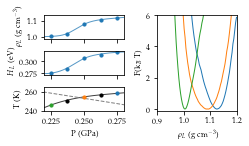

In [59]:
#fig, axs = plt.subplots(3,1,sharex=True)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)

fig, axs = plt.subplot_mosaic([['ul', 'right'],
                               ['cl', 'right'],
                               ['ll', 'right']],
                              figsize=(3.5, 2.), layout="constrained")


groundstateenergy=-16.365200977904333
eV_to_kJmol=96.48530749925791
   
factor=10*18.01528/(6.0221408)
folders=np.array([
    "IceXIII/Run-decrease-pressure-individual/step.0/0",
    "IceXIII/Run-decrease-pressure-individual/step.0/0",
    "IceXIII/Run-decrease-pressure-individual/step.0/2",
    "IceXIII/Run-decrease-pressure-individual/step.1/0",
    "IceXIII/Run-decrease-pressure-individual/step.1/2",
    "IceXIII/Run-decrease-pressure-individual/step.1/3",
    "IceXIII/Run-decrease-pressure-individual/step.1/3"
])
Nmolecules_array=np.array([
    192,
    192,
    192,
    192,
    192,
    192,
    192
])
mycolors=np.array([
        'black',
        colors[0],
        'black',
        colors[1],
        'black',
        colors[2],
        'black'
])
Ndata=folders.shape[0]
mytemperatureXIII=np.zeros(Ndata)
mypressureXIII=np.zeros(Ndata)
mydensityXIII=np.zeros(Ndata)
myenthalpyXIII=np.zeros(Ndata)
mynumbersXIII=np.zeros(Ndata)
counter=0
for folder in folders:
    filename=folder + "/phase2/thermo.phase2.every10"
    filename2=folder + "/in.thermosettings"
    print(filename)
    if (exists(filename)):  
        pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
        temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
        str_temp="{:.2f}".format(float(temperature.strip()))
        data=np.genfromtxt(filename)
        #if (j<0):
        #    Nmolecules=336
        #else:
        Nmolecules=Nmolecules_array[counter]
        ignore=int(data.shape[0]/4)
        print(counter,str_temp + " K",str(int(float(pressure.strip()))) + " bar",factor/(np.mean(data[ignore:,2]/Nmolecules)),np.mean(data[ignore:,1]/Nmolecules))
        mytemperatureXIII[counter]=float(str_temp)
        mypressureXIII[counter]=float(pressure.strip())/10000
        mydensityXIII[counter]=factor/(np.mean(data[ignore:,2]/Nmolecules))
        myenthalpyXIII[counter]=np.mean(data[ignore:,1]/Nmolecules)-groundstateenergy
        mynumbersXIII[counter]=counter
        counter += 1
    else:
        print("No file " + filename)

mypressureXIII[-1] *= 0.95
mydensityXIII[-1] *= 0.99        
myenthalpyXIII[-1] *= 1.0001      
mypressureXIII[0] *= 1.05
mydensityXIII[0] *= 1.01       
myenthalpyXIII[0] *= 0.9999      
mymarkersize=10

axs["ul"].scatter(mypressureXIII,mydensityXIII,color=colors[0],s=mymarkersize)
axs["ul"].set_ylabel(r"$\rho_L$ (g cm$^{-3}$)")
print(mypressureV)
f_spline = UnivariateSpline(np.flip(mypressureXIII),np.flip(mydensityXIII),s=0.00005)
x=np.linspace(0.22,0.28,1000)
axs["ul"].plot(x,f_spline(x),color=colors[0],alpha=0.75,linewidth=1,zorder=0)
axs["ul"].set_xlim([0.22,0.28])
axs["ul"].set_xticklabels([])

#ax2 = ax1.twinx()
axs["cl"].scatter(mypressureXIII[:-1],myenthalpyXIII[:-1],color=colors[0],s=mymarkersize)
axs["cl"].set_ylabel("$H_L$ (eV)")
f_spline = UnivariateSpline(np.flip(mypressureXIII),np.flip(myenthalpyXIII),s=0.000005)
x=np.linspace(0.22,0.28,1000)
axs["cl"].plot(x,f_spline(x),color=colors[0],alpha=0.75,linewidth=1,zorder=0)
axs["cl"].set_xlim([0.22,0.28])
axs["cl"].set_xticklabels([])

for i in range(1,mypressureXIII.shape[0]-1):
    axs["ll"].scatter(mypressureXIII[i],mytemperatureXIII[i],s=mymarkersize,color=mycolors[i])
    
thermo = np.genfromtxt("Results/thermo_condition_iceXIII.txt")
f_spline = UnivariateSpline(thermo[:,0]/10000,thermo[:,1],s=0.01)
x=np.linspace(0.22,0.28,1000)
axs["ll"].plot(x,f_spline(x),color='black',alpha=0.75,linewidth=1,zorder=0)

widom=np.genfromtxt("Results/WidomLineErr.txt")
widom=widom[widom[:,1]<3100,:]
widom[:,1]=widom[:,1]/10000
widom[:,2]=widom[:,2]/10000
axs["ll"].plot(widom[:,1],widom[:,0],'--',color='gray',linewidth=1,zorder=0)



axs["ll"].set_xlim([0.22,0.28])
axs["ll"].set_ylim([240,265])
axs["ll"].set_xlabel("P (GPa)")
axs["ll"].set_ylabel("T (K)")
#axs["ll"].text(0.19,240,"Ice V coexistence line",fontsize=15)

folders=np.array([
    "IceXIII/Run-decrease-pressure-individual/step.0/0",
    "IceXIII/Run-decrease-pressure-individual/step.1/0",
    "IceXIII/Run-decrease-pressure-individual/step.1/3"
])
Nmolecules_array=np.array([
    192,
    192,
    192
])
counter=0
for folder in folders:
    filename=folder + "/phase2/thermo.phase2"
    filename2=folder + "/in.thermosettings"
    if (exists(filename)):  
        pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
        temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
        #print(pressure,temperature)
        str_temp="{:.2f}".format(float(temperature.strip()))
        #print(str_temp)
        data=np.genfromtxt(filename)
        Nmolecules=Nmolecules_array[counter]
        ignore=int(data.shape[0]/4)
        #if (counter==0):
        #    Nbins=30
        #else:
        Nbins=90
        histo, bins = np.histogram(factor/(data[ignore:,2]/Nmolecules),range=(0.9,1.2),bins=Nbins,density=True) # ,range=(25.5,31.5)
        bin_ctr = (bins[1:]+bins[:-1])/2
        fes = -np.log(histo)
        fes -= np.amin(fes)
        axs["right"].plot(bin_ctr,fes,label=str_temp + " K - " + str(int(float(pressure.strip()))) + " bar",linewidth=1)
        counter += 1
    else:
        print("No file " + filename)
            
axs["right"].set_ylim([-0.1,6])
axs["right"].set_xlim([0.9,1.2])
#plt.legend(fontsize=15)
axs["right"].set_xlabel(r"$\rho_L$ (g cm$^{-3}$)")
axs["right"].set_ylabel("F(k$_B$ T)")

plt.tight_layout()

plt.savefig("figure4-iceXIII.pdf",bbox_inches='tight')  # publication quality

plt.show()

## Ice IV

IceIV-LargeBoxCoexistencePoint/Run-Individual-1/step.0/0/phase2/thermo.phase2.every10
0 261.65 K 2500 bar 1.1028233677420196 -16.04813513455818
IceIV-LargeBoxCoexistencePoint/Run-Individual-1/step.0/0/phase2/thermo.phase2.every10
1 261.65 K 2500 bar 1.1028233677420196 -16.04813513455818
IceIV-LargeBoxCoexistencePoint/Run-Individual-1/step.0/2/phase2/thermo.phase2.every10
2 259.28 K 2375 bar 1.080640100913533 -16.055086638261564
IceIV-LargeBoxCoexistencePoint/Run-Individual-1/step.1/0/phase2/thermo.phase2.every10
3 256.61 K 2250 bar 1.0464289036961358 -16.06657380216471
IceIV-LargeBoxCoexistencePoint/Run-Individual-1/step.1/2/phase2/thermo.phase2.every10
4 248.95 K 2125 bar 0.9882327820470437 -16.09180821853693
IceIV-LargeBoxCoexistencePoint/Run-Individual-1/step.1/3/phase2/thermo.phase2.every10
5 241.59 K 2000 bar 0.9934003074004724 -16.1004874054065
IceIV-LargeBoxCoexistencePoint/Run-Individual-1/step.1/3/phase2/thermo.phase2.every10
6 241.59 K 2000 bar 0.9934003074004724 -16.10048740

/usr/licensed/anaconda3/2019.3/lib/python3.7/site-packages/ipykernel_launcher.py:165: RuntimeWarning: divide by zero encountered in log
/usr/licensed/anaconda3/2019.3/lib/python3.7/site-packages/ipykernel_launcher.py:178: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


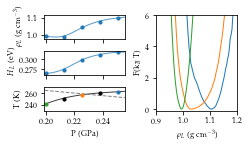

In [57]:
#fig, axs = plt.subplots(3,1,sharex=True)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)

fig, axs = plt.subplot_mosaic([['ul', 'right'],
                               ['cl', 'right'],
                               ['ll', 'right']],
                              figsize=(3.5, 2.), layout="constrained")

groundstateenergy=-16.365200977904333
eV_to_kJmol=96.48530749925791

factor=10*18.01528/(6.0221408)
folders=np.array([
    "IceIV/Run-decrease-pressure-individual/step.0/0",
    "IceIV/Run-decrease-pressure-individual/step.0/0",
    "IceIV/Run-decrease-pressure-individual/step.0/2",
    "IceIV/Run-decrease-pressure-individual/step.1/0",
    "IceIV/Run-decrease-pressure-individual/step.1/2",
    "IceIV/Run-decrease-pressure-individual/step.1/3",
    "IceIV/Run-decrease-pressure-individual/step.1/3"
])
Nmolecules_array=np.array([
    192,
    192,
    192,
    192,
    192,
    192,
    192
])
mycolors=np.array([
        'black',
        colors[0],
        'black',
        colors[1],
        'black',
        colors[2],
        'black'
])
Ndata=folders.shape[0]
mytemperatureXIII=np.zeros(Ndata)
mypressureXIII=np.zeros(Ndata)
mydensityXIII=np.zeros(Ndata)
myenthalpyXIII=np.zeros(Ndata)
mynumbersXIII=np.zeros(Ndata)
counter=0
for folder in folders:
    filename=folder + "/phase2/thermo.phase2.every10"
    filename2=folder + "/in.thermosettings"
    print(filename)
    if (exists(filename)):  
        pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
        temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
        str_temp="{:.2f}".format(float(temperature.strip()))
        data=np.genfromtxt(filename)
        #if (j<0):
        #    Nmolecules=336
        #else:
        Nmolecules=Nmolecules_array[counter]
        ignore=int(data.shape[0]/4)
        print(counter,str_temp + " K",str(int(float(pressure.strip()))) + " bar",factor/(np.mean(data[ignore:,2]/Nmolecules)),np.mean(data[ignore:,1]/Nmolecules))
        mytemperatureXIII[counter]=float(str_temp)
        mypressureXIII[counter]=float(pressure.strip())/10000
        mydensityXIII[counter]=factor/(np.mean(data[ignore:,2]/Nmolecules))
        myenthalpyXIII[counter]=np.mean(data[ignore:,1]/Nmolecules)-groundstateenergy
        mynumbersXIII[counter]=counter
        counter += 1
    else:
        print("No file " + filename)

mypressureXIII[-1] *= 0.95
mydensityXIII[-1] *= 0.99        
myenthalpyXIII[-1] *= 1.0001      
mypressureXIII[0] *= 1.05
mydensityXIII[0] *= 1.01       
myenthalpyXIII[0] *= 0.9999      
mymarkersize=10

axs["ul"].scatter(mypressureXIII,mydensityXIII,color=colors[0],s=mymarkersize)
axs["ul"].set_ylabel(r"$\rho_L$ (g cm$^{-3}$)")
print(mypressureV)
f_spline = UnivariateSpline(np.flip(mypressureXIII),np.flip(mydensityXIII),s=0.00005)
x=np.linspace(0.199,0.255,1000)
axs["ul"].plot(x,f_spline(x),color=colors[0],alpha=0.75,linewidth=1,zorder=0)
axs["ul"].set_xlim([0.199,0.255])
axs["ul"].set_xticklabels([])

#ax2 = ax1.twinx()
axs["cl"].scatter(mypressureXIII[:-1],myenthalpyXIII[:-1],color=colors[0],s=mymarkersize)
axs["cl"].set_ylabel("$H_L$ (eV)")
f_spline = UnivariateSpline(np.flip(mypressureXIII),np.flip(myenthalpyXIII),s=0.000005)
x=np.linspace(0.199,0.255,1000)
axs["cl"].plot(x,f_spline(x),color=colors[0],alpha=0.75,linewidth=1,zorder=0)
axs["cl"].set_xlim([0.199,0.255])
axs["cl"].set_xticklabels([])

for i in range(1,mypressureXIII.shape[0]-1):
    axs["ll"].scatter(mypressureXIII[i],mytemperatureXIII[i],s=mymarkersize,color=mycolors[i])
    
thermo = np.genfromtxt("Results/thermo_condition_iceIV.txt")
f_spline = UnivariateSpline(thermo[:,0]/10000,thermo[:,1],s=0.01)
x=np.linspace(0.199,0.255,1000)
axs["ll"].plot(x,f_spline(x),color='black',alpha=0.75,linewidth=1,zorder=0)

widom=np.genfromtxt("Results/WidomLineErr.txt")
widom=widom[widom[:,1]<3100,:]
widom[:,1]=widom[:,1]/10000
widom[:,2]=widom[:,2]/10000
axs["ll"].plot(widom[:,1],widom[:,0],'--',color='gray',linewidth=1,zorder=0)


axs["ll"].set_xlim([0.199,0.255])
axs["ll"].set_ylim([230,270])
axs["ll"].set_xlabel("P (GPa)")
axs["ll"].set_ylabel("T (K)")
#axs["ll"].text(0.19,240,"Ice V coexistence line",fontsize=15)

folders=np.array([
    "IceIV/Run-decrease-pressure-individual/step.0/0",
    "IceIV/Run-decrease-pressure-individual/step.1/0",
    "IceIV/Run-decrease-pressure-individual/step.1/3"
])
Nmolecules_array=np.array([
    192,
    192,
    192
])
counter=0
for folder in folders:
    filename=folder + "/phase2/thermo.phase2"
    filename2=folder + "/in.thermosettings"
    if (exists(filename)):  
        pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
        temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
        #print(pressure,temperature)
        str_temp="{:.2f}".format(float(temperature.strip()))
        #print(str_temp)
        data=np.genfromtxt(filename)
        Nmolecules=Nmolecules_array[counter]
        ignore=int(data.shape[0]/4)
        #if (counter==0):
        #    Nbins=30
        #else:
        Nbins=90
        histo, bins = np.histogram(factor/(data[ignore:,2]/Nmolecules),range=(0.9,1.2),bins=Nbins,density=True) # ,range=(25.5,31.5)
        bin_ctr = (bins[1:]+bins[:-1])/2
        fes = -np.log(histo)
        fes -= np.amin(fes)
        axs["right"].plot(bin_ctr,fes,label=str_temp + " K - " + str(int(float(pressure.strip()))) + " bar",linewidth=1)
        counter += 1
    else:
        print("No file " + filename)
            
axs["right"].set_ylim([-0.1,6])
axs["right"].set_xlim([0.9,1.2])
#plt.legend(fontsize=15)
axs["right"].set_xlabel(r"$\rho_L$ (g cm$^{-3}$)")
axs["right"].set_ylabel("F(k$_B$ T)")

plt.tight_layout()

plt.savefig("figure4-iceIV.pdf",bbox_inches='tight')  # publication quality

plt.show()

## Ice III

IceIII/Run-Individual-1/step.0/0/phase2/thermo.phase2
0 272.77 K 2250 bar 1.0992361511756767 -16.0373401571116
IceIII/Run-Individual-1/step.0/0/phase2/thermo.phase2
1 272.77 K 2250 bar 1.0992361511756767 -16.0373401571116
IceIII/Run-Individual-1/step.0/2/phase2/thermo.phase2
2 271.49 K 2125 bar 1.084805196822357 -16.042245067710503
IceIII/Run-Individual-1/step.1/0/phase2/thermo.phase2
3 270.24 K 2000 bar 1.0763210808534636 -16.04700866346491
IceIII/Run-Individual-1/step.1/2/phase2/thermo.phase2
4 268.35 K 1875 bar 1.0527906778660958 -16.05516668357635
IceIII/Run-Individual-1/step.2/0/phase2/thermo.phase2
5 266.48 K 1750 bar 1.0374248799004153 -16.061994834419824
IceIII/Run-Individual-1/step.2/2/phase2/thermo.phase2
6 263.72 K 1625 bar 1.0057694668433608 -16.07581120149117
IceIII/Run-Individual-1/step.2/3/phase2/thermo.phase2
7 258.96 K 1500 bar 0.9910271247678982 -16.093230699460307
IceIII/Run-Individual-1/step.2/3/phase2/thermo.phase2
8 258.96 K 1500 bar 0.9910271247678982 -16.0932306

/usr/licensed/anaconda3/2019.3/lib/python3.7/site-packages/ipykernel_launcher.py:171: RuntimeWarning: divide by zero encountered in log
/usr/licensed/anaconda3/2019.3/lib/python3.7/site-packages/ipykernel_launcher.py:184: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


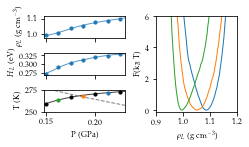

In [61]:
#fig, axs = plt.subplots(3,1,sharex=True)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)

fig, axs = plt.subplot_mosaic([['ul', 'right'],
                               ['cl', 'right'],
                               ['ll', 'right']],
                              figsize=(3.5, 2.), layout="constrained")

groundstateenergy=-16.365200977904333
eV_to_kJmol=96.48530749925791

factor=10*18.01528/(6.0221408)
folders=np.array([
    "IceIII/Run-decrease-pressure-individual/step.0/0",
    "IceIII/Run-decrease-pressure-individual/step.0/0",
    "IceIII/Run-decrease-pressure-individual/step.0/2",
    "IceIII/Run-decrease-pressure-individual/step.1/0",
    "IceIII/Run-decrease-pressure-individual/step.1/2",
    "IceIII/Run-decrease-pressure-individual/step.2/0",
    "IceIII/Run-decrease-pressure-individual/step.2/2",
    "IceIII/Run-decrease-pressure-individual/step.2/3",
    "IceIII/Run-decrease-pressure-individual/step.2/3"
])
Nmolecules_array=np.array([
    192,
    192,
    192,
    192,
    192,
    192,
    192,
    192,
    192
])
mycolors=np.array([
        'black',
        'black',
        colors[0],
        'black',
        colors[1],
        'black',
        colors[2],
        'black',
        'black'
])
Ndata=folders.shape[0]
mytemperatureIII=np.zeros(Ndata)
mypressureIII=np.zeros(Ndata)
mydensityIII=np.zeros(Ndata)
myenthalpyIII=np.zeros(Ndata)
mynumbersIII=np.zeros(Ndata)
counter=0
for folder in folders:
    filename=folder + "/phase2/thermo.phase2"
    filename2=folder + "/in.thermosettings"
    print(filename)
    if (exists(filename)):  
        pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
        temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
        str_temp="{:.2f}".format(float(temperature.strip()))
        data=np.genfromtxt(filename)
        #if (j<0):
        #    Nmolecules=336
        #else:
        Nmolecules=Nmolecules_array[counter]
        ignore=int(data.shape[0]/4)
        print(counter,str_temp + " K",str(int(float(pressure.strip()))) + " bar",factor/(np.mean(data[ignore:,2]/Nmolecules)),np.mean(data[ignore:,1]/Nmolecules))
        mytemperatureIII[counter]=float(str_temp)
        mypressureIII[counter]=float(pressure.strip())/10000
        mydensityIII[counter]=factor/(np.mean(data[ignore:,2]/Nmolecules))
        myenthalpyIII[counter]=np.mean(data[ignore:,1]/Nmolecules)-groundstateenergy
        mynumbersIII[counter]=counter
        counter += 1
    else:
        print("No file " + filename)

mypressureIII[-1] *= 0.95
mydensityIII[-1] *= 0.99        
myenthalpyIII[-1] *= 1.0001      
mypressureIII[0] *= 1.05
mydensityIII[0] *= 1.01       
myenthalpyIII[0] *= 0.9999      
mymarkersize=10

axs["ul"].scatter(mypressureIII,mydensityIII,color=colors[0],s=mymarkersize)
axs["ul"].set_ylabel(r"$\rho_L$ (g cm$^{-3}$)")
print(mypressureV)
f_spline = UnivariateSpline(np.flip(mypressureIII),np.flip(mydensityIII),s=0.00005)
x=np.linspace(0.148,0.23,1000)
axs["ul"].plot(x,f_spline(x),color=colors[0],alpha=0.75,linewidth=1,zorder=0)
axs["ul"].set_xlim([0.148,0.23])
axs["ul"].set_xticklabels([])

#ax2 = ax1.twinx()
axs["cl"].scatter(mypressureIII[:-1],myenthalpyIII[:-1],color=colors[0],s=mymarkersize)
axs["cl"].set_ylabel("$H_L$ (eV)")
f_spline = UnivariateSpline(np.flip(mypressureIII),np.flip(myenthalpyIII),s=0.000005)
x=np.linspace(0.148,0.23,1000)
axs["cl"].plot(x,f_spline(x),color=colors[0],alpha=0.75,linewidth=1,zorder=0)
axs["cl"].set_xlim([0.148,0.23])
axs["cl"].set_xticklabels([])

for i in range(1,mypressureIII.shape[0]-1):
    axs["ll"].scatter(mypressureIII[i],mytemperatureIII[i],s=mymarkersize,color=mycolors[i])
    
thermo = np.genfromtxt("Results/thermo_condition_iceIII.txt")
f_spline = UnivariateSpline(thermo[:,0]/10000,thermo[:,1],s=0.01)
x=np.linspace(0.148,0.23,1000)
axs["ll"].plot(x,f_spline(x),color='black',alpha=0.75,linewidth=1,zorder=0)

widom=np.genfromtxt("Results/WidomLineErr.txt")
widom=widom[widom[:,1]<3100,:]
widom[:,1]=widom[:,1]/10000
widom[:,2]=widom[:,2]/10000
axs["ll"].plot(widom[:,1],widom[:,0],'--',color='gray',linewidth=1,zorder=0)


axs["ll"].set_xlim([0.148,0.23])
axs["ll"].set_ylim([250,275])
axs["ll"].set_xlabel("P (GPa)")
axs["ll"].set_ylabel("T (K)")
#axs["ll"].text(0.19,240,"Ice V coexistence line",fontsize=15)

folders=np.array([
    "IceIII/Run-decrease-pressure-individual/step.0/2",
    "IceIII/Run-decrease-pressure-individual/step.1/2",
    "IceIII/Run-decrease-pressure-individual/step.2/2"
])
Nmolecules_array=np.array([
    192,
    192,
    192
])
counter=0
for folder in folders:
    filename=folder + "/phase2/thermo.phase2"
    filename2=folder + "/in.thermosettings"
    if (exists(filename)):  
        pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
        temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
        #print(pressure,temperature)
        str_temp="{:.2f}".format(float(temperature.strip()))
        #print(str_temp)
        data=np.genfromtxt(filename)
        Nmolecules=Nmolecules_array[counter]
        ignore=int(data.shape[0]/4)
        #if (counter==0):
        #    Nbins=30
        #else:
        Nbins=90
        histo, bins = np.histogram(factor/(data[ignore:,2]/Nmolecules),range=(0.9,1.2),bins=Nbins,density=True) # ,range=(25.5,31.5)
        bin_ctr = (bins[1:]+bins[:-1])/2
        fes = -np.log(histo)
        fes -= np.amin(fes)
        axs["right"].plot(bin_ctr,fes,label=str_temp + " K - " + str(int(float(pressure.strip()))) + " bar",linewidth=1)
        counter += 1
    else:
        print("No file " + filename)
            
axs["right"].set_ylim([-0.1,6])
axs["right"].set_xlim([0.9,1.2])
#plt.legend(fontsize=15)
axs["right"].set_xlabel(r"$\rho_L$ (g cm$^{-3}$)")
axs["right"].set_ylabel("F(k$_B$ T)")

plt.tight_layout()

plt.savefig("figure4-iceIII.pdf",bbox_inches='tight')  # publication quality

plt.show()

## All ices

IceV/Run-Individual-1/step.0/0/phase1/thermo.phase1
0 263.16 0.225 1.3051704104356272 0.2722097735414941
IceV/Run-Individual-1/step.0/2/phase1/thermo.phase1
1 260.19 0.2125 1.3050967157345756 0.26799350108475295
IceV/Run-Individual-1/step.1/0/phase1/thermo.phase1
2 257.24 0.2 1.3051480162928681 0.263648700242161
IceV/Run-Individual-1/step.1/2/phase1/thermo.phase1
3 247.79 0.1875 1.307307476302926 0.25388410533791017
IceV/Run-Individual-1/step.1/3/phase1/thermo.phase1
4 235.99 0.175 1.3101884215673234 0.24215742806945784
[0.225  0.2125 0.2    0.1875 0.175 ]
IceIII/Run-Individual-1/step.0/0/phase1/thermo.phase1
0 272.77 0.225 1.2139225062607208 0.27809183329949505
IceIII/Run-Individual-1/step.0/2/phase1/thermo.phase1
1 271.49 0.2125 1.212795190880823 0.2752089468943417
IceIII/Run-Individual-1/step.1/0/phase1/thermo.phase1
2 270.24 0.2 1.2117610107316399 0.2722799627859125
IceIII/Run-Individual-1/step.1/2/phase1/thermo.phase1
3 268.35 0.1875 1.211049518655224 0.2688469888683862
IceIII/Run

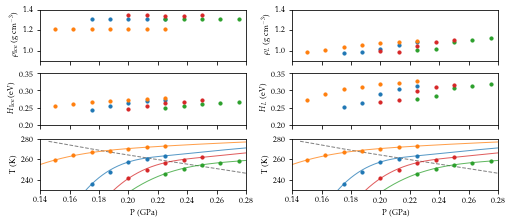

In [80]:
#fig, axs = plt.subplots(3,1,sharex=True)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)

fig, axs = plt.subplot_mosaic([['ul','ur'],
                               ['cl','cr'],
                               ['ll','lr']],
                              figsize=(7, 3.), layout="constrained")

groundstateenergy=-16.365200977904333
eV_to_kJmol=96.48530749925791

# Ices
# Ice V

factor=10*18.01528/(6.0221408)
folders=np.array([
    "IceV/Run-decrease-pressure-individual/step.0/0",
    "IceV/Run-decrease-pressure-individual/step.0/2",
    "IceV/Run-decrease-pressure-individual/step.1/0",
    "IceV/Run-decrease-pressure-individual/step.1/2",
    "IceV/Run-decrease-pressure-individual/step.1/3"
])
Nmolecules=336
Ndata=folders.shape[0]
mytemperatureV=np.zeros(Ndata)
mypressureV=np.zeros(Ndata)
mydensityV=np.zeros(Ndata)
myenthalpyV=np.zeros(Ndata)
mynumbersV=np.zeros(Ndata)
counter=0
for folder in folders:
    filename=folder + "/phase1/thermo.phase1"
    filename2=folder + "/in.thermosettings"
    print(filename)
    if (exists(filename)):  
        pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
        temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
        str_temp="{:.2f}".format(float(temperature.strip()))
        data=np.genfromtxt(filename)
        ignore=int(data.shape[0]/4)
        print(counter,str_temp,float(pressure.strip())/10000,factor/(np.mean(data[ignore:,2]/Nmolecules)),np.mean(data[ignore:,1]/Nmolecules)-groundstateenergy)
        mytemperatureV[counter]=float(str_temp)
        mypressureV[counter]=float(pressure.strip())/10000
        mydensityV[counter]=factor/(np.mean(data[ignore:,2]/Nmolecules))
        myenthalpyV[counter]=np.mean(data[ignore:,1]/Nmolecules)-groundstateenergy
        mynumbersV[counter]=counter
        counter += 1
    else:
        print("No file " + filename)
            
mymarkersize=10

axs["ul"].scatter(mypressureV,mydensityV,color=colors[0],s=mymarkersize)
axs["ul"].set_ylabel(r"$\rho_\mathrm{Ice}$ (g cm$^{-3}$)")
print(mypressureV)
axs["ul"].set_xlim([0.14,0.28])
axs["ul"].set_xticklabels([])

axs["cl"].scatter(mypressureV,myenthalpyV,color=colors[0],s=mymarkersize)
axs["cl"].set_ylabel("$H_\mathrm{Ice}$ (eV)")
axs["cl"].set_xlim([0.14,0.28])
axs["cl"].set_xticklabels([])

for i in range(mypressureV.shape[0]):
    axs["ll"].scatter(mypressureV[i],mytemperatureV[i],s=mymarkersize,color=colors[0])
    
thermo = np.genfromtxt("Results/thermo_condition_iceV.txt")
f_spline = UnivariateSpline(thermo[:,0]/10000,thermo[:,1],s=0.01)
x=np.linspace(0.14,0.28,1000)
axs["ll"].plot(x,f_spline(x),color=colors[0],alpha=0.75,linewidth=1,zorder=0)

widom=np.genfromtxt("Results/WidomLineErr.txt")
widom=widom[widom[:,1]<3100,:]
widom[:,1]=widom[:,1]/10000
widom[:,2]=widom[:,2]/10000
axs["ll"].plot(widom[:,1],widom[:,0],'--',color='gray',linewidth=1,zorder=0)
axs["ll"].set_xlim([0.14,0.28])
axs["ll"].set_ylim([230,280])
axs["ll"].set_xlabel("P (GPa)")
axs["ll"].set_ylabel("T (K)")

# Ice III


factor=10*18.01528/(6.0221408)
folders=np.array([
    "IceIII/Run-decrease-pressure-individual/step.0/0",
    "IceIII/Run-decrease-pressure-individual/step.0/2",
    "IceIII/Run-decrease-pressure-individual/step.1/0",
    "IceIII/Run-decrease-pressure-individual/step.1/2",
    "IceIII/Run-decrease-pressure-individual/step.2/0",
    "IceIII/Run-decrease-pressure-individual/step.2/2",
    "IceIII/Run-decrease-pressure-individual/step.2/3"
])
Nmolecules=324
Ndata=folders.shape[0]
mytemperatureIII=np.zeros(Ndata)
mypressureIII=np.zeros(Ndata)
mydensityIII=np.zeros(Ndata)
myenthalpyIII=np.zeros(Ndata)
mynumbersIII=np.zeros(Ndata)
counter=0
for folder in folders:
    filename=folder + "/phase1/thermo.phase1"
    filename2=folder + "/in.thermosettings"
    print(filename)
    if (exists(filename)):  
        pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
        temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
        str_temp="{:.2f}".format(float(temperature.strip()))
        data=np.genfromtxt(filename)
        ignore=int(data.shape[0]/4)
        print(counter,str_temp,float(pressure.strip())/10000,factor/(np.mean(data[ignore:,2]/Nmolecules)),np.mean(data[ignore:,1]/Nmolecules)-groundstateenergy)
        mytemperatureIII[counter]=float(str_temp)
        mypressureIII[counter]=float(pressure.strip())/10000
        mydensityIII[counter]=factor/(np.mean(data[ignore:,2]/Nmolecules))
        myenthalpyIII[counter]=np.mean(data[ignore:,1]/Nmolecules)-groundstateenergy
        mynumbersIII[counter]=counter
        counter += 1
    else:
        print("No file " + filename)
            
mymarkersize=10

axs["ul"].scatter(mypressureIII,mydensityIII,color=colors[1],s=mymarkersize)
print(mypressureV)


axs["cl"].scatter(mypressureIII,myenthalpyIII,color=colors[1],s=mymarkersize)


for i in range(mypressureIII.shape[0]):
    axs["ll"].scatter(mypressureIII[i],mytemperatureIII[i],s=mymarkersize,color=colors[1])
    
thermo = np.genfromtxt("Results/thermo_condition_iceIII.txt")
f_spline = UnivariateSpline(thermo[:,0]/10000,thermo[:,1],s=0.01)
x=np.linspace(0.14,0.28,1000)
axs["ll"].plot(x,f_spline(x),color=colors[1],alpha=0.75,linewidth=1,zorder=0)


# Ice XIII


factor=10*18.01528/(6.0221408)
folders=np.array([
    "IceXIII/Run-decrease-pressure-individual/step.0/0",
    "IceXIII/Run-decrease-pressure-individual/step.0/2",
    "IceXIII/Run-decrease-pressure-individual/step.1/0",
    "IceXIII/Run-decrease-pressure-individual/step.1/2",
    "IceXIII/Run-decrease-pressure-individual/step.1/3"
])
Nmolecules=336
Ndata=folders.shape[0]
mytemperatureXIII=np.zeros(Ndata)
mypressureXIII=np.zeros(Ndata)
mydensityXIII=np.zeros(Ndata)
myenthalpyXIII=np.zeros(Ndata)
mynumbersXIII=np.zeros(Ndata)
counter=0
for folder in folders:
    filename=folder + "/phase1/thermo.phase1"
    filename2=folder + "/in.thermosettings"
    print(filename)
    if (exists(filename)):  
        pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
        temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
        str_temp="{:.2f}".format(float(temperature.strip()))
        data=np.genfromtxt(filename)
        ignore=int(data.shape[0]/4)
        print(counter,str_temp,float(pressure.strip())/10000,factor/(np.mean(data[ignore:,2]/Nmolecules)),np.mean(data[ignore:,1]/Nmolecules)-groundstateenergy)
        mytemperatureXIII[counter]=float(str_temp)
        mypressureXIII[counter]=float(pressure.strip())/10000
        mydensityXIII[counter]=factor/(np.mean(data[ignore:,2]/Nmolecules))
        myenthalpyXIII[counter]=np.mean(data[ignore:,1]/Nmolecules)-groundstateenergy
        mynumbersXIII[counter]=counter
        counter += 1
    else:
        print("No file " + filename)
            
mymarkersize=10

axs["ul"].scatter(mypressureXIII,mydensityXIII,color=colors[2],s=mymarkersize)
print(mypressureV)
#f_spline = UnivariateSpline(np.flip(mypressureV),np.flip(mydensityV),s=0.00005)
#x=np.linspace(0.17,0.255,1000)
#axs["ul"].plot(x,f_spline(x),color=colors[0],alpha=0.75,linewidth=1,zorder=0)

axs["cl"].scatter(mypressureXIII,myenthalpyXIII,color=colors[2],s=mymarkersize)
#f_spline = UnivariateSpline(np.flip(mypressureV),np.flip(myenthalpyV),s=0.000005)
#x=np.linspace(0.17,0.255,1000)
#axs["cl"].plot(x,f_spline(x),color=colors[0],alpha=0.75,linewidth=1,zorder=0)

for i in range(mypressureXIII.shape[0]):
    axs["ll"].scatter(mypressureXIII[i],mytemperatureXIII[i],s=mymarkersize,color=colors[2])
    
thermo = np.genfromtxt("Results/thermo_condition_iceXIII.txt")
f_spline = UnivariateSpline(thermo[:,0]/10000,thermo[:,1],s=0.01)
x=np.linspace(0.14,0.28,1000)
axs["ll"].plot(x,f_spline(x),color=colors[2],alpha=0.75,linewidth=1,zorder=0)

# Ice IV


factor=10*18.01528/(6.0221408)
folders=np.array([
    "IceIV/Run-decrease-pressure-individual/step.0/0",
    "IceIV/Run-decrease-pressure-individual/step.0/2",
    "IceIV/Run-decrease-pressure-individual/step.1/0",
    "IceIV/Run-decrease-pressure-individual/step.1/2",
    "IceIV/Run-decrease-pressure-individual/step.1/3"
])
Nmolecules=1024
Ndata=folders.shape[0]
mytemperatureIV=np.zeros(Ndata)
mypressureIV=np.zeros(Ndata)
mydensityIV=np.zeros(Ndata)
myenthalpyIV=np.zeros(Ndata)
mynumbersIV=np.zeros(Ndata)
counter=0
for folder in folders:
    filename=folder + "/phase1/thermo.phase1"
    filename2=folder + "/in.thermosettings"
    print(filename)
    if (exists(filename)):  
        pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
        temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
        str_temp="{:.2f}".format(float(temperature.strip()))
        data=np.genfromtxt(filename)
        ignore=int(data.shape[0]/4)
        print(counter,str_temp,float(pressure.strip())/10000,factor/(np.mean(data[ignore:,2]/Nmolecules)),np.mean(data[ignore:,1]/Nmolecules)-groundstateenergy)
        mytemperatureIV[counter]=float(str_temp)
        mypressureIV[counter]=float(pressure.strip())/10000
        mydensityIV[counter]=factor/(np.mean(data[ignore:,2]/Nmolecules))
        myenthalpyIV[counter]=np.mean(data[ignore:,1]/Nmolecules)-groundstateenergy
        mynumbersIV[counter]=counter
        counter += 1
    else:
        print("No file " + filename)
            
mymarkersize=10

axs["ul"].scatter(mypressureIV,mydensityIV,color=colors[3],s=mymarkersize)
print(mypressureV)


axs["cl"].scatter(mypressureIV,myenthalpyIV,color=colors[3],s=mymarkersize)

for i in range(mypressureIV.shape[0]):
    axs["ll"].scatter(mypressureIV[i],mytemperatureIV[i],s=mymarkersize,color=colors[3])
    
thermo = np.genfromtxt("Results/thermo_condition_iceIV.txt")
f_spline = UnivariateSpline(thermo[:,0]/10000,thermo[:,1],s=0.01)
x=np.linspace(0.14,0.28,1000)
axs["ll"].plot(x,f_spline(x),color=colors[3],alpha=0.75,linewidth=1,zorder=0)

## Liquid

# Ice V

factor=10*18.01528/(6.0221408)
folders=np.array([
    "IceV/Run-decrease-pressure-individual/step.0/0",
    "IceV/Run-decrease-pressure-individual/step.0/2",
    "IceV/Run-decrease-pressure-individual/step.1/0",
    "IceV/Run-decrease-pressure-individual/step.1/2",
    "IceV/Run-decrease-pressure-individual/step.1/3"
])
Nmolecules=192
Ndata=folders.shape[0]
mytemperatureV=np.zeros(Ndata)
mypressureV=np.zeros(Ndata)
mydensityV=np.zeros(Ndata)
myenthalpyV=np.zeros(Ndata)
mynumbersV=np.zeros(Ndata)
counter=0
for folder in folders:
    filename=folder + "/phase2/thermo.phase2.every10"
    filename2=folder + "/in.thermosettings"
    print(filename)
    if (exists(filename)):  
        pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
        temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
        str_temp="{:.2f}".format(float(temperature.strip()))
        data=np.genfromtxt(filename)
        ignore=int(data.shape[0]/4)
        print(counter,str_temp,float(pressure.strip())/10000,factor/(np.mean(data[ignore:,2]/Nmolecules)),np.mean(data[ignore:,1]/Nmolecules)-groundstateenergy)
        mytemperatureV[counter]=float(str_temp)
        mypressureV[counter]=float(pressure.strip())/10000
        mydensityV[counter]=factor/(np.mean(data[ignore:,2]/Nmolecules))
        myenthalpyV[counter]=np.mean(data[ignore:,1]/Nmolecules)-groundstateenergy
        mynumbersV[counter]=counter
        counter += 1
    else:
        print("No file " + filename)
            
mymarkersize=10

axs["ur"].scatter(mypressureV,mydensityV,color=colors[0],s=mymarkersize)
axs["ur"].set_ylabel(r"$\rho_L$ (g cm$^{-3}$)")
print(mypressureV)
axs["ur"].set_xlim([0.14,0.28])
axs["ur"].set_xticklabels([])

axs["cr"].scatter(mypressureV,myenthalpyV,color=colors[0],s=mymarkersize)
axs["cr"].set_ylabel("$H_L$ (eV)")
axs["cr"].set_xlim([0.14,0.28])
axs["cr"].set_xticklabels([])

for i in range(mypressureV.shape[0]):
    axs["lr"].scatter(mypressureV[i],mytemperatureV[i],s=mymarkersize,color=colors[0])
    
thermo = np.genfromtxt("Results/thermo_condition_iceV.txt")
f_spline = UnivariateSpline(thermo[:,0]/10000,thermo[:,1],s=0.01)
x=np.linspace(0.14,0.28,1000)
axs["lr"].plot(x,f_spline(x),color=colors[0],alpha=0.75,linewidth=1,zorder=0)

widom=np.genfromtxt("Results/WidomLineErr.txt")
widom=widom[widom[:,1]<3100,:]
widom[:,1]=widom[:,1]/10000
widom[:,2]=widom[:,2]/10000
axs["lr"].plot(widom[:,1],widom[:,0],'--',color='gray',linewidth=1,zorder=0)
axs["lr"].set_xlim([0.14,0.28])
axs["lr"].set_ylim([230,280])
axs["lr"].set_xlabel("P (GPa)")
axs["lr"].set_ylabel("T (K)")

# Ice III


factor=10*18.01528/(6.0221408)
folders=np.array([
    "IceIII/Run-decrease-pressure-individual/step.0/0",
    "IceIII/Run-decrease-pressure-individual/step.0/2",
    "IceIII/Run-decrease-pressure-individual/step.1/0",
    "IceIII/Run-decrease-pressure-individual/step.1/2",
    "IceIII/Run-decrease-pressure-individual/step.2/0",
    "IceIII/Run-decrease-pressure-individual/step.2/2",
    "IceIII/Run-decrease-pressure-individual/step.2/3"
])
Nmolecules=192
Ndata=folders.shape[0]
mytemperatureIII=np.zeros(Ndata)
mypressureIII=np.zeros(Ndata)
mydensityIII=np.zeros(Ndata)
myenthalpyIII=np.zeros(Ndata)
mynumbersIII=np.zeros(Ndata)
counter=0
for folder in folders:
    filename=folder + "/phase2/thermo.phase2.every10"
    filename2=folder + "/in.thermosettings"
    print(filename)
    if (exists(filename)):  
        pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
        temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
        str_temp="{:.2f}".format(float(temperature.strip()))
        data=np.genfromtxt(filename)
        ignore=int(data.shape[0]/4)
        print(counter,str_temp,float(pressure.strip())/10000,factor/(np.mean(data[ignore:,2]/Nmolecules)),np.mean(data[ignore:,1]/Nmolecules)-groundstateenergy)
        mytemperatureIII[counter]=float(str_temp)
        mypressureIII[counter]=float(pressure.strip())/10000
        mydensityIII[counter]=factor/(np.mean(data[ignore:,2]/Nmolecules))
        myenthalpyIII[counter]=np.mean(data[ignore:,1]/Nmolecules)-groundstateenergy
        mynumbersIII[counter]=counter
        counter += 1
    else:
        print("No file " + filename)
            
mymarkersize=10

axs["ur"].scatter(mypressureIII,mydensityIII,color=colors[1],s=mymarkersize)
print(mypressureV)
#f_spline = UnivariateSpline(np.flip(mypressureV),np.flip(mydensityV),s=0.00005)
#x=np.linspace(0.17,0.255,1000)
#axs["ul"].plot(x,f_spline(x),color=colors[0],alpha=0.75,linewidth=1,zorder=0)

axs["cr"].scatter(mypressureIII,myenthalpyIII,color=colors[1],s=mymarkersize)
#f_spline = UnivariateSpline(np.flip(mypressureV),np.flip(myenthalpyV),s=0.000005)
#x=np.linspace(0.17,0.255,1000)
#axs["cl"].plot(x,f_spline(x),color=colors[0],alpha=0.75,linewidth=1,zorder=0)

for i in range(mypressureIII.shape[0]):
    axs["lr"].scatter(mypressureIII[i],mytemperatureIII[i],s=mymarkersize,color=colors[1])
    
thermo = np.genfromtxt("Results/thermo_condition_iceIII.txt")
f_spline = UnivariateSpline(thermo[:,0]/10000,thermo[:,1],s=0.01)
x=np.linspace(0.14,0.28,1000)
axs["lr"].plot(x,f_spline(x),color=colors[1],alpha=0.75,linewidth=1,zorder=0)


# Ice XIII


factor=10*18.01528/(6.0221408)
folders=np.array([
    "IceXIII/Run-decrease-pressure-individual/step.0/0",
    "IceXIII/Run-decrease-pressure-individual/step.0/2",
    "IceXIII/Run-decrease-pressure-individual/step.1/0",
    "IceXIII/Run-decrease-pressure-individual/step.1/2",
    "IceXIII/Run-decrease-pressure-individual/step.1/3"
])
Nmolecules=192
Ndata=folders.shape[0]
mytemperatureXIII=np.zeros(Ndata)
mypressureXIII=np.zeros(Ndata)
mydensityXIII=np.zeros(Ndata)
myenthalpyXIII=np.zeros(Ndata)
mynumbersXIII=np.zeros(Ndata)
counter=0
for folder in folders:
    filename=folder + "/phase2/thermo.phase2.every10"
    filename2=folder + "/in.thermosettings"
    print(filename)
    if (exists(filename)):  
        pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
        temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
        str_temp="{:.2f}".format(float(temperature.strip()))
        data=np.genfromtxt(filename)
        ignore=int(data.shape[0]/4)
        print(counter,str_temp,float(pressure.strip())/10000,factor/(np.mean(data[ignore:,2]/Nmolecules)),np.mean(data[ignore:,1]/Nmolecules)-groundstateenergy)
        mytemperatureXIII[counter]=float(str_temp)
        mypressureXIII[counter]=float(pressure.strip())/10000
        mydensityXIII[counter]=factor/(np.mean(data[ignore:,2]/Nmolecules))
        myenthalpyXIII[counter]=np.mean(data[ignore:,1]/Nmolecules)-groundstateenergy
        mynumbersXIII[counter]=counter
        counter += 1
    else:
        print("No file " + filename)
            
mymarkersize=10

axs["ur"].scatter(mypressureXIII,mydensityXIII,color=colors[2],s=mymarkersize)
print(mypressureV)
#f_spline = UnivariateSpline(np.flip(mypressureV),np.flip(mydensityV),s=0.00005)
#x=np.linspace(0.17,0.255,1000)
#axs["ul"].plot(x,f_spline(x),color=colors[0],alpha=0.75,linewidth=1,zorder=0)

axs["cr"].scatter(mypressureXIII,myenthalpyXIII,color=colors[2],s=mymarkersize)
#f_spline = UnivariateSpline(np.flip(mypressureV),np.flip(myenthalpyV),s=0.000005)
#x=np.linspace(0.17,0.255,1000)
#axs["cl"].plot(x,f_spline(x),color=colors[0],alpha=0.75,linewidth=1,zorder=0)

for i in range(mypressureXIII.shape[0]):
    axs["lr"].scatter(mypressureXIII[i],mytemperatureXIII[i],s=mymarkersize,color=colors[2])
    
thermo = np.genfromtxt("Results/thermo_condition_iceXIII.txt")
f_spline = UnivariateSpline(thermo[:,0]/10000,thermo[:,1],s=0.01)
x=np.linspace(0.14,0.28,1000)
axs["lr"].plot(x,f_spline(x),color=colors[2],alpha=0.75,linewidth=1,zorder=0)

# Ice IV


factor=10*18.01528/(6.0221408)
folders=np.array([
    "IceIV/Run-decrease-pressure-individual/step.0/0",
    "IceIV/Run-decrease-pressure-individual/step.0/2",
    "IceIV/Run-decrease-pressure-individual/step.1/0",
    "IceIV/Run-decrease-pressure-individual/step.1/2",
    "IceIV/Run-decrease-pressure-individual/step.1/3"
])
Nmolecules=192
Ndata=folders.shape[0]
mytemperatureIV=np.zeros(Ndata)
mypressureIV=np.zeros(Ndata)
mydensityIV=np.zeros(Ndata)
myenthalpyIV=np.zeros(Ndata)
mynumbersIV=np.zeros(Ndata)
counter=0
for folder in folders:
    filename=folder + "/phase2/thermo.phase2.every10"
    filename2=folder + "/in.thermosettings"
    print(filename)
    if (exists(filename)):  
        pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
        temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
        str_temp="{:.2f}".format(float(temperature.strip()))
        data=np.genfromtxt(filename)
        ignore=int(data.shape[0]/4)
        print(counter,str_temp,float(pressure.strip())/10000,factor/(np.mean(data[ignore:,2]/Nmolecules)),np.mean(data[ignore:,1]/Nmolecules)-groundstateenergy)
        mytemperatureIV[counter]=float(str_temp)
        mypressureIV[counter]=float(pressure.strip())/10000
        mydensityIV[counter]=factor/(np.mean(data[ignore:,2]/Nmolecules))
        myenthalpyIV[counter]=np.mean(data[ignore:,1]/Nmolecules)-groundstateenergy
        mynumbersIV[counter]=counter
        counter += 1
    else:
        print("No file " + filename)
            
mymarkersize=10

axs["ur"].scatter(mypressureIV,mydensityIV,color=colors[3],s=mymarkersize)
print(mypressureV)

axs["cr"].scatter(mypressureIV,myenthalpyIV,color=colors[3],s=mymarkersize)

for i in range(mypressureIV.shape[0]):
    axs["lr"].scatter(mypressureIV[i],mytemperatureIV[i],s=mymarkersize,color=colors[3])
    
thermo = np.genfromtxt("Results/thermo_condition_iceIV.txt")
f_spline = UnivariateSpline(thermo[:,0]/10000,thermo[:,1],s=0.01)
x=np.linspace(0.14,0.28,1000)
axs["lr"].plot(x,f_spline(x),color=colors[3],alpha=0.75,linewidth=1,zorder=0)


axs["cr"].set_ylim([0.2,0.35])
axs["cl"].set_ylim([0.2,0.35])
axs["ur"].set_ylim([0.9,1.4])
axs["ul"].set_ylim([0.9,1.4])

plt.savefig("ices-vs-liquid-properties.pdf",bbox_inches='tight')  # publication quality

plt.show()

## Trajectories
### Volume of water

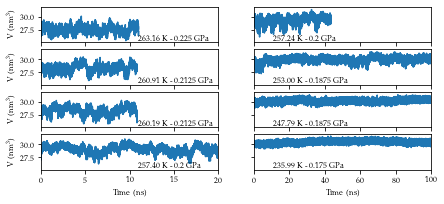

In [9]:
#fig, axs = plt.subplots(3,1,sharex=True)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)

plt.rcParams['figure.figsize'] = (7.,3.)
fig, axs = plt.subplots(4,2,sharey=True)

for i in range(4):
    for j in range(2):
        filename="IceV/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/phase2/thermo.phase2.every10"
        filename2="IceV/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/in.thermosettings"
        if (exists(filename)):  
            pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
            temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
            #print(pressure,temperature)
            str_temp="{:.2f}".format(float(temperature.strip()))
            #print(str_temp)
            data=np.genfromtxt(filename)
            Nmolecules=192
            axs[i,j].plot(timestep*data[::10,0],data[::10,2]/Nmolecules,color=colors[0])
            axs[i,j].text(11,25.25,str_temp + " K - " + str(float(pressure.strip())/10000) + " GPa")
            if (j==0):
                axs[i,j].set_ylabel(r"V (nm$^3$)")
            if (i==3):
                axs[i,j].set_xlabel("Time (ns)")
            if (j==0):
                axs[i,j].set_xlim([0,20])
            elif (j==1):
                axs[i,j].set_xlim([0,100])
            if (i!=3):
                axs[i,j].set_xticklabels([])
        else:
            print("No file " + filename)
#axs[0,0].set_title("Ice V",color=colors[0])
#axs[0,1].set_title("Liquid",color=colors[1])
#axs[0,0].set_ylabel("Energy (eV)")
#axs[1,0].set_ylabel("Energy (eV)")
#axs[1,1].set_xlabel("Time (ns)")
#axs[0,0].text(5,25,"263.16 K - 2250 bar")
#axs[1,0].text(5,25,"260.91 K - 2125 bar")
#axs[2,0].text(5,25,"260.19 K - 2125 bar")
#axs[3,0].text(5,25,"257.40 K - 2000 bar")

plt.savefig("liquid-traj-volume-iceV.pdf",bbox_inches='tight')  # publication quality

plt.show()

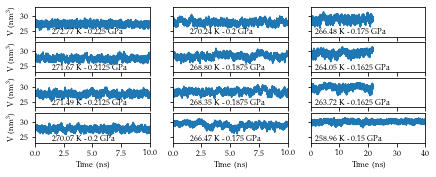

In [8]:
#fig, axs = plt.subplots(3,1,sharex=True)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)

plt.rcParams['figure.figsize'] = (7.,2.5)
fig, axs = plt.subplots(4,3,sharey=True)

for i in range(4):
    for j in range(3):
        filename="IceIII/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/phase2/thermo.phase2.every10"
        filename2="IceIII/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/in.thermosettings"
        if (exists(filename)):  
            pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
            temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
            #print(pressure,temperature)
            str_temp="{:.2f}".format(float(temperature.strip()))
            #print(str_temp)
            data=np.genfromtxt(filename)
            Nmolecules=192
            axs[i,j].plot(timestep*data[::10,0],data[::10,2]/Nmolecules,color=colors[0])
            axs[i,j].text(1.5,23.3,str_temp + " K - " + str(float(pressure.strip())/10000) + " GPa")
            if (j==0):
                axs[i,j].set_ylabel(r"V (nm$^3$)")
            if (i==3):
                axs[i,j].set_xlabel("Time (ns)")
            if (j==0):
                axs[i,j].set_xlim([0,10])
            elif (j==1):
                axs[i,j].set_xlim([0,10])
            elif (j==2):
                axs[i,j].set_xlim([0,40])
            if (i!=3):
                axs[i,j].set_xticklabels([])
            axs[i,j].set_ylim([23,33])
        else:
            print("No file " + filename)
#axs[0,0].set_title("Ice V",color=colors[0])
#axs[0,1].set_title("Liquid",color=colors[1])
#axs[0,0].set_ylabel("Energy (eV)")
#axs[1,0].set_ylabel("Energy (eV)")
#axs[1,1].set_xlabel("Time (ns)")
#axs[0,0].text(5,25,"263.16 K - 2250 bar")
#axs[1,0].text(5,25,"260.91 K - 2125 bar")
#axs[2,0].text(5,25,"260.19 K - 2125 bar")
#axs[3,0].text(5,25,"257.40 K - 2000 bar")

plt.savefig("liquid-traj-volume-iceIII.pdf",bbox_inches='tight')  # publication quality

plt.show()

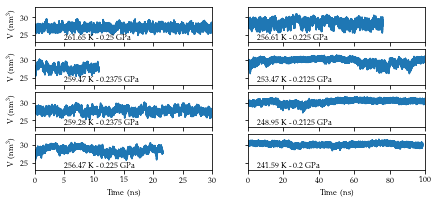

In [13]:
#fig, axs = plt.subplots(3,1,sharex=True)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)

plt.rcParams['figure.figsize'] = (7.,3.)
fig, axs = plt.subplots(4,2,sharey=True)

for i in range(4):
    for j in range(2):
        filename="IceIV/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/phase2/thermo.phase2.every10"
        filename2="IceIV/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/in.thermosettings"
        if (exists(filename)):  
            pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
            temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
            #print(pressure,temperature)
            str_temp="{:.2f}".format(float(temperature.strip()))
            #print(str_temp)
            data=np.genfromtxt(filename)
            Nmolecules=192
            axs[i,j].plot(timestep*data[::10,0],data[::10,2]/Nmolecules,color=colors[0])
            axs[i,j].text(5,23.5,str_temp + " K - " + str(float(pressure.strip())/10000) + " GPa")
            if (j==0):
                axs[i,j].set_ylabel(r"V (nm$^3$)")
            if (i==3):
                axs[i,j].set_xlabel("Time (ns)")
            if (j==0):
                axs[i,j].set_xlim([0,30])
            elif (j==1):
                axs[i,j].set_xlim([0,100])
            if (i!=3):
                axs[i,j].set_xticklabels([])
            axs[i,j].set_ylim([23,33])
        else:
            print("No file " + filename)
#axs[0,0].set_title("Ice V",color=colors[0])
#axs[0,1].set_title("Liquid",color=colors[1])
#axs[0,0].set_ylabel("Energy (eV)")
#axs[1,0].set_ylabel("Energy (eV)")
#axs[1,1].set_xlabel("Time (ns)")
#axs[0,0].text(5,25,"263.16 K - 2250 bar")
#axs[1,0].text(5,25,"260.91 K - 2125 bar")
#axs[2,0].text(5,25,"260.19 K - 2125 bar")
#axs[3,0].text(5,25,"257.40 K - 2000 bar")

plt.savefig("liquid-traj-volume-iceIV.pdf",bbox_inches='tight')  # publication quality

plt.show()

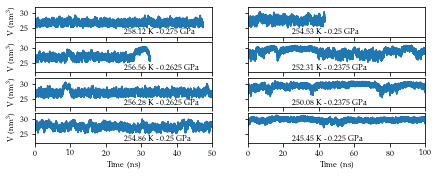

In [17]:
#fig, axs = plt.subplots(3,1,sharex=True)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)

plt.rcParams['figure.figsize'] = (7.,2.5)
fig, axs = plt.subplots(4,2,sharey=True)

for i in range(4):
    for j in range(2):
        filename="IceXIII/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/phase2/thermo.phase2.every10"
        filename2="IceXIII/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/in.thermosettings"
        if (exists(filename)):  
            pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
            temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
            #print(pressure,temperature)
            str_temp="{:.2f}".format(float(temperature.strip()))
            #print(str_temp)
            data=np.genfromtxt(filename)
            Nmolecules=192
            axs[i,j].plot(timestep*data[::10,0],data[::10,2]/Nmolecules,color=colors[0])
            axs[i,j].text(25,22.5,str_temp + " K - " + str(float(pressure.strip())/10000) + " GPa")
            if (j==0):
                axs[i,j].set_ylabel(r"V (nm$^3$)")
            if (i==3):
                axs[i,j].set_xlabel("Time (ns)")
            if (j==0):
                axs[i,j].set_xlim([0,50])
            elif (j==1):
                axs[i,j].set_xlim([0,100])
            if (i!=3):
                axs[i,j].set_xticklabels([])
            axs[i,j].set_ylim([22,32])
        else:
            print("No file " + filename)
#axs[0,0].set_title("Ice V",color=colors[0])
#axs[0,1].set_title("Liquid",color=colors[1])
#axs[0,0].set_ylabel("Energy (eV)")
#axs[1,0].set_ylabel("Energy (eV)")
#axs[1,1].set_xlabel("Time (ns)")
#axs[0,0].text(5,25,"263.16 K - 2250 bar")
#axs[1,0].text(5,25,"260.91 K - 2125 bar")
#axs[2,0].text(5,25,"260.19 K - 2125 bar")
#axs[3,0].text(5,25,"257.40 K - 2000 bar")

plt.savefig("liquid-traj-volume-iceXIII.pdf",bbox_inches='tight')  # publication quality

plt.show()

## Trajectories
### Enthalpy of water

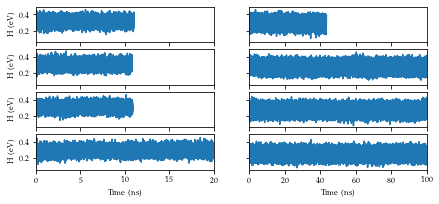

In [19]:
#fig, axs = plt.subplots(3,1,sharex=True)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)

plt.rcParams['figure.figsize'] = (7.,3.)
fig, axs = plt.subplots(4,2,sharey=True)
groundstateenergy=-16.365200977904333

for i in range(4):
    for j in range(2):
        filename="IceV/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/phase2/thermo.phase2.every10"
        filename2="IceV/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/in.thermosettings"
        if (exists(filename)):  
            pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
            temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
            #print(pressure,temperature)
            str_temp="{:.2f}".format(float(temperature.strip()))
            #print(str_temp)
            data=np.genfromtxt(filename)
            Nmolecules=192
            axs[i,j].plot(timestep*data[::10,0],(data[::10,1]/Nmolecules)-groundstateenergy,color=colors[0])
            #axs[i,j].text(11,25.25,str_temp + " K - " + str(float(pressure.strip())/10000) + " GPa")
            if (j==0):
                axs[i,j].set_ylabel(r"H (eV)")
            if (i==3):
                axs[i,j].set_xlabel("Time (ns)")
            if (j==0):
                axs[i,j].set_xlim([0,20])
            elif (j==1):
                axs[i,j].set_xlim([0,100])
            if (i!=3):
                axs[i,j].set_xticklabels([])
        else:
            print("No file " + filename)
#axs[0,0].set_title("Ice V",color=colors[0])
#axs[0,1].set_title("Liquid",color=colors[1])
#axs[0,0].set_ylabel("Energy (eV)")
#axs[1,0].set_ylabel("Energy (eV)")
#axs[1,1].set_xlabel("Time (ns)")
#axs[0,0].text(5,25,"263.16 K - 2250 bar")
#axs[1,0].text(5,25,"260.91 K - 2125 bar")
#axs[2,0].text(5,25,"260.19 K - 2125 bar")
#axs[3,0].text(5,25,"257.40 K - 2000 bar")

#plt.savefig("liquid-traj-enthalpy-iceV.pdf",bbox_inches='tight')  # publication quality

plt.show()

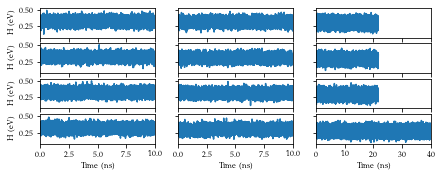

In [20]:
#fig, axs = plt.subplots(3,1,sharex=True)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)

plt.rcParams['figure.figsize'] = (7.,2.5)
fig, axs = plt.subplots(4,3,sharey=True)
groundstateenergy=-16.365200977904333

for i in range(4):
    for j in range(3):
        filename="IceIII/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/phase2/thermo.phase2.every10"
        filename2="IceIII/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/in.thermosettings"
        if (exists(filename)):  
            pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
            temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
            #print(pressure,temperature)
            str_temp="{:.2f}".format(float(temperature.strip()))
            #print(str_temp)
            data=np.genfromtxt(filename)
            Nmolecules=192
            axs[i,j].plot(timestep*data[::10,0],(data[::10,1]/Nmolecules)-groundstateenergy,color=colors[0])
            #axs[i,j].text(1.5,23.3,str_temp + " K - " + str(float(pressure.strip())/10000) + " GPa")
            if (j==0):
                axs[i,j].set_ylabel(r"H (eV)")
            if (i==3):
                axs[i,j].set_xlabel("Time (ns)")
            if (j==0):
                axs[i,j].set_xlim([0,10])
            elif (j==1):
                axs[i,j].set_xlim([0,10])
            elif (j==2):
                axs[i,j].set_xlim([0,40])
            if (i!=3):
                axs[i,j].set_xticklabels([])
            #axs[i,j].set_ylim([23,33])
        else:
            print("No file " + filename)
#axs[0,0].set_title("Ice V",color=colors[0])
#axs[0,1].set_title("Liquid",color=colors[1])
#axs[0,0].set_ylabel("Energy (eV)")
#axs[1,0].set_ylabel("Energy (eV)")
#axs[1,1].set_xlabel("Time (ns)")
#axs[0,0].text(5,25,"263.16 K - 2250 bar")
#axs[1,0].text(5,25,"260.91 K - 2125 bar")
#axs[2,0].text(5,25,"260.19 K - 2125 bar")
#axs[3,0].text(5,25,"257.40 K - 2000 bar")

#plt.savefig("liquid-traj-enthalpy-iceIII.pdf",bbox_inches='tight')  # publication quality

plt.show()

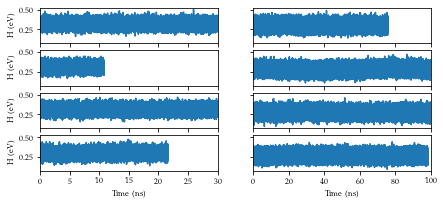

In [21]:
#fig, axs = plt.subplots(3,1,sharex=True)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)

plt.rcParams['figure.figsize'] = (7.,3.)
fig, axs = plt.subplots(4,2,sharey=True)
groundstateenergy=-16.365200977904333

for i in range(4):
    for j in range(2):
        filename="IceIV/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/phase2/thermo.phase2.every10"
        filename2="IceIV/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/in.thermosettings"
        if (exists(filename)):  
            pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
            temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
            #print(pressure,temperature)
            str_temp="{:.2f}".format(float(temperature.strip()))
            #print(str_temp)
            data=np.genfromtxt(filename)
            Nmolecules=192
            axs[i,j].plot(timestep*data[::10,0],(data[::10,1]/Nmolecules)-groundstateenergy,color=colors[0])
            #axs[i,j].text(5,23.5,str_temp + " K - " + str(float(pressure.strip())/10000) + " GPa")
            if (j==0):
                axs[i,j].set_ylabel(r"H (eV)")
            if (i==3):
                axs[i,j].set_xlabel("Time (ns)")
            if (j==0):
                axs[i,j].set_xlim([0,30])
            elif (j==1):
                axs[i,j].set_xlim([0,100])
            if (i!=3):
                axs[i,j].set_xticklabels([])
            #axs[i,j].set_ylim([23,33])
        else:
            print("No file " + filename)
#axs[0,0].set_title("Ice V",color=colors[0])
#axs[0,1].set_title("Liquid",color=colors[1])
#axs[0,0].set_ylabel("Energy (eV)")
#axs[1,0].set_ylabel("Energy (eV)")
#axs[1,1].set_xlabel("Time (ns)")
#axs[0,0].text(5,25,"263.16 K - 2250 bar")
#axs[1,0].text(5,25,"260.91 K - 2125 bar")
#axs[2,0].text(5,25,"260.19 K - 2125 bar")
#axs[3,0].text(5,25,"257.40 K - 2000 bar")

#plt.savefig("liquid-traj-enthalpy-iceIV.pdf",bbox_inches='tight')  # publication quality

plt.show()

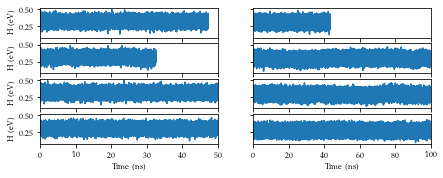

In [22]:
#fig, axs = plt.subplots(3,1,sharex=True)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)

plt.rcParams['figure.figsize'] = (7.,2.5)
fig, axs = plt.subplots(4,2,sharey=True)

groundstateenergy=-16.365200977904333

for i in range(4):
    for j in range(2):
        filename="IceXIII/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/phase2/thermo.phase2.every10"
        filename2="IceXIII/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/in.thermosettings"
        if (exists(filename)):  
            pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
            temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
            #print(pressure,temperature)
            str_temp="{:.2f}".format(float(temperature.strip()))
            #print(str_temp)
            data=np.genfromtxt(filename)
            Nmolecules=192
            axs[i,j].plot(timestep*data[::10,0],(data[::10,1]/Nmolecules)-groundstateenergy,color=colors[0])
           # axs[i,j].text(25,22.5,str_temp + " K - " + str(float(pressure.strip())/10000) + " GPa")
            if (j==0):
                axs[i,j].set_ylabel(r"H (eV)")
            if (i==3):
                axs[i,j].set_xlabel("Time (ns)")
            if (j==0):
                axs[i,j].set_xlim([0,50])
            elif (j==1):
                axs[i,j].set_xlim([0,100])
            if (i!=3):
                axs[i,j].set_xticklabels([])
            #axs[i,j].set_ylim([22,32])
        else:
            print("No file " + filename)
#axs[0,0].set_title("Ice V",color=colors[0])
#axs[0,1].set_title("Liquid",color=colors[1])
#axs[0,0].set_ylabel("Energy (eV)")
#axs[1,0].set_ylabel("Energy (eV)")
#axs[1,1].set_xlabel("Time (ns)")
#axs[0,0].text(5,25,"263.16 K - 2250 bar")
#axs[1,0].text(5,25,"260.91 K - 2125 bar")
#axs[2,0].text(5,25,"260.19 K - 2125 bar")
#axs[3,0].text(5,25,"257.40 K - 2000 bar")

#plt.savefig("liquid-traj-enthalpy-iceXIII.pdf",bbox_inches='tight')  # publication quality

plt.show()

## Trajectories
### Volume of ices

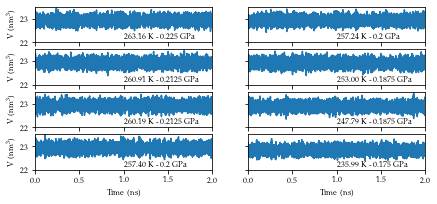

In [41]:
#fig, axs = plt.subplots(3,1,sharex=True)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)

plt.rcParams['figure.figsize'] = (7.,3.)
fig, axs = plt.subplots(4,2,sharey=True)

for i in range(4):
    for j in range(2):
        filename="IceV/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/phase1/thermo.phase1"
        filename2="IceV/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/in.thermosettings"
        if (exists(filename)):  
            pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
            temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
            #print(pressure,temperature)
            str_temp="{:.2f}".format(float(temperature.strip()))
            #print(str_temp)
            data=np.genfromtxt(filename)
            Nmolecules=336
            axs[i,j].plot(timestep*data[::10,0],data[::10,2]/Nmolecules,color=colors[0])
            axs[i,j].text(1,22.1,str_temp + " K - " + str(float(pressure.strip())/10000) + " GPa")
            if (j==0):
                axs[i,j].set_ylabel(r"V (nm$^3$)")
            if (i==3):
                axs[i,j].set_xlabel("Time (ns)")
            if (j==0):
                axs[i,j].set_xlim([0,2])
            elif (j==1):
                axs[i,j].set_xlim([0,2])
            if (i!=3):
                axs[i,j].set_xticklabels([])
            axs[i,j].set_ylim([22,23.5])
        else:
            print("No file " + filename)
#axs[0,0].set_title("Ice V",color=colors[0])
#axs[0,1].set_title("Liquid",color=colors[1])
#axs[0,0].set_ylabel("Energy (eV)")
#axs[1,0].set_ylabel("Energy (eV)")
#axs[1,1].set_xlabel("Time (ns)")
#axs[0,0].text(5,25,"263.16 K - 2250 bar")
#axs[1,0].text(5,25,"260.91 K - 2125 bar")
#axs[2,0].text(5,25,"260.19 K - 2125 bar")
#axs[3,0].text(5,25,"257.40 K - 2000 bar")

plt.savefig("ice-traj-volume-iceV.pdf",bbox_inches='tight')  # publication quality

plt.show()

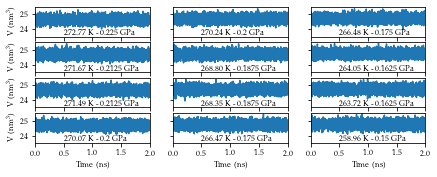

In [40]:
#fig, axs = plt.subplots(3,1,sharex=True)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)

plt.rcParams['figure.figsize'] = (7.,2.5)
fig, axs = plt.subplots(4,3,sharey=True)

for i in range(4):
    for j in range(3):
        filename="IceIII/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/phase1/thermo.phase1"
        filename2="IceIII/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/in.thermosettings"
        if (exists(filename)):  
            pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
            temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
            #print(pressure,temperature)
            str_temp="{:.2f}".format(float(temperature.strip()))
            #print(str_temp)
            data=np.genfromtxt(filename)
            Nmolecules=324
            axs[i,j].plot(timestep*data[::10,0],data[::10,2]/Nmolecules,color=colors[0])
            axs[i,j].text(0.5,23.55,str_temp + " K - " + str(float(pressure.strip())/10000) + " GPa")
            if (j==0):
                axs[i,j].set_ylabel(r"V (nm$^3$)")
            if (i==3):
                axs[i,j].set_xlabel("Time (ns)")
            if (j==0):
                axs[i,j].set_xlim([0,2])
            elif (j==1):
                axs[i,j].set_xlim([0,2])
            elif (j==2):
                axs[i,j].set_xlim([0,2])
            if (i!=3):
                axs[i,j].set_xticklabels([])
            axs[i,j].set_ylim([23.5,25.5])
        else:
            print("No file " + filename)
#axs[0,0].set_title("Ice V",color=colors[0])
#axs[0,1].set_title("Liquid",color=colors[1])
#axs[0,0].set_ylabel("Energy (eV)")
#axs[1,0].set_ylabel("Energy (eV)")
#axs[1,1].set_xlabel("Time (ns)")
#axs[0,0].text(5,25,"263.16 K - 2250 bar")
#axs[1,0].text(5,25,"260.91 K - 2125 bar")
#axs[2,0].text(5,25,"260.19 K - 2125 bar")
#axs[3,0].text(5,25,"257.40 K - 2000 bar")

plt.savefig("ice-traj-volume-iceIII.pdf",bbox_inches='tight')  # publication quality

plt.show()

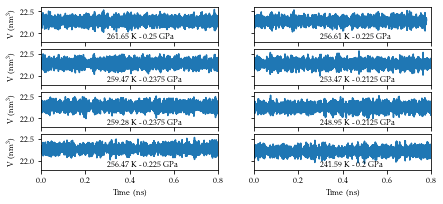

In [43]:
#fig, axs = plt.subplots(3,1,sharex=True)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)

plt.rcParams['figure.figsize'] = (7.,3.)
fig, axs = plt.subplots(4,2,sharey=True)

for i in range(4):
    for j in range(2):
        filename="IceIV/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/phase1/thermo.phase1"
        filename2="IceIV/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/in.thermosettings"
        if (exists(filename)):  
            pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
            temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
            #print(pressure,temperature)
            str_temp="{:.2f}".format(float(temperature.strip()))
            #print(str_temp)
            data=np.genfromtxt(filename)
            Nmolecules=1024
            axs[i,j].plot(timestep*data[::10,0],data[::10,2]/Nmolecules,color=colors[0])
            axs[i,j].text(0.3,21.85,str_temp + " K - " + str(float(pressure.strip())/10000) + " GPa")
            if (j==0):
                axs[i,j].set_ylabel(r"V (nm$^3$)")
            if (i==3):
                axs[i,j].set_xlabel("Time (ns)")
            if (j==0):
                axs[i,j].set_xlim([0,0.8])
            elif (j==1):
                axs[i,j].set_xlim([0,0.8])
            if (i!=3):
                axs[i,j].set_xticklabels([])
            axs[i,j].set_ylim([21.8,22.6])
        else:
            print("No file " + filename)
#axs[0,0].set_title("Ice V",color=colors[0])
#axs[0,1].set_title("Liquid",color=colors[1])
#axs[0,0].set_ylabel("Energy (eV)")
#axs[1,0].set_ylabel("Energy (eV)")
#axs[1,1].set_xlabel("Time (ns)")
#axs[0,0].text(5,25,"263.16 K - 2250 bar")
#axs[1,0].text(5,25,"260.91 K - 2125 bar")
#axs[2,0].text(5,25,"260.19 K - 2125 bar")
#axs[3,0].text(5,25,"257.40 K - 2000 bar")

plt.savefig("ice-traj-volume-iceIV.pdf",bbox_inches='tight')  # publication quality

plt.show()

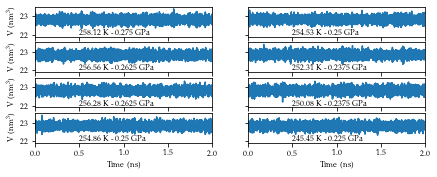

In [44]:
#fig, axs = plt.subplots(3,1,sharex=True)
font = {'family' : 'serif',
'serif'   : 'palatino',
'style'   : 'normal',
'variant'   : 'normal',
'stretch'   : 'normal',
'weight'   : 'normal',
'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)

plt.rcParams['figure.figsize'] = (7.,2.5)
fig, axs = plt.subplots(4,2,sharey=True)

for i in range(4):
    for j in range(2):
        filename="IceXIII/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/phase1/thermo.phase1"
        filename2="IceXIII/Run-decrease-pressure-individual/step." + str(j) + "/" + str(i) + "/in.thermosettings"
        if (exists(filename)):  
            pressure = os.popen("grep 'pressure ' " + str(filename2) + " | awk '{print $4}'").read()
            temperature = os.popen("grep 'temperature ' " + str(filename2) + " | awk '{print $4}'").read()
            #print(pressure,temperature)
            str_temp="{:.2f}".format(float(temperature.strip()))
            #print(str_temp)
            data=np.genfromtxt(filename)
            Nmolecules=336
            axs[i,j].plot(timestep*data[::10,0],data[::10,2]/Nmolecules,color=colors[0])
            axs[i,j].text(0.5,21.95,str_temp + " K - " + str(float(pressure.strip())/10000) + " GPa")
            if (j==0):
                axs[i,j].set_ylabel(r"V (nm$^3$)")
            if (i==3):
                axs[i,j].set_xlabel("Time (ns)")
            if (j==0):
                axs[i,j].set_xlim([0,2])
            elif (j==1):
                axs[i,j].set_xlim([0,2])
            if (i!=3):
                axs[i,j].set_xticklabels([])
            axs[i,j].set_ylim([21.9,23.5])
        else:
            print("No file " + filename)
#axs[0,0].set_title("Ice V",color=colors[0])
#axs[0,1].set_title("Liquid",color=colors[1])
#axs[0,0].set_ylabel("Energy (eV)")
#axs[1,0].set_ylabel("Energy (eV)")
#axs[1,1].set_xlabel("Time (ns)")
#axs[0,0].text(5,25,"263.16 K - 2250 bar")
#axs[1,0].text(5,25,"260.91 K - 2125 bar")
#axs[2,0].text(5,25,"260.19 K - 2125 bar")
#axs[3,0].text(5,25,"257.40 K - 2000 bar")

plt.savefig("ice-traj-volume-iceXIII.pdf",bbox_inches='tight')  # publication quality

plt.show()